# Edges



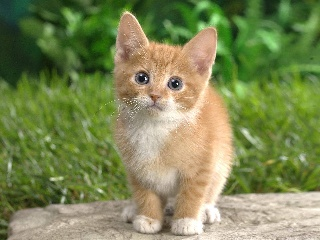

In [1]:
(ns opencv4.threshold
  (:require
    [opencv4.core :refer :all]
    [opencv4.utils :as u]))

(def neko
  (->
  "resources/images/cat.jpg"
  imread
  (u/resize-by 0.2)))
(u/>>> neko)

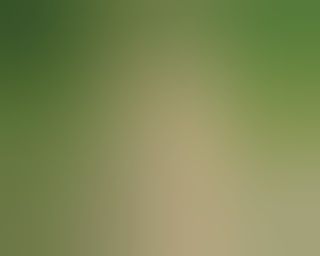

In [2]:
(def factor 6)
(def background (new-mat))
(def work (clone neko))

(dotimes [_ factor] (pyr-down! work))
(bilateral-filter work background 9 9 7)
(dotimes [_ factor] (pyr-up! background))
(resize! background (new-size (.cols neko) (.rows neko)))
(u/>>> background)

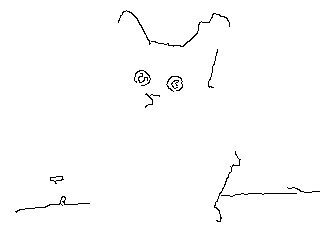

In [3]:

(def
  c
  (-> neko
  clone
  (blur! (new-size 3 3))
  (cvt-color! COLOR_BGR2GRAY)
  (canny! 300.0 100.0 3 true)
  (bitwise-not!)
  (cvt-color! COLOR_GRAY2BGR)  ))
(u/>>> c)

In [4]:
(let [result (new-mat) ]
  (bitwise-and background c result)
  (u/>>> result))

CvException cv::Exception: OpenCV(4.3.0) /home/vagrant/origami-land/opencv-native/opencv/modules/core/src/arithm.cpp:234: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'binary_op'
  org.opencv.core.Core.bitwise_and_1 (Core.java:-2)


class org.opencv.core.CvException: 

In [5]:
(def t
(-> neko
  clone
  (blur! (new-size 3 3))
  (cvt-color! COLOR_BGR2GRAY)
  (threshold! 150 255 THRESH_BINARY_INV)
  (cvt-color! COLOR_GRAY2BGR)  ))

(let [result (new-mat) ]
  (bitwise-and background t result)
  (u/>>> result))

CvException cv::Exception: OpenCV(4.3.0) /home/vagrant/origami-land/opencv-native/opencv/modules/core/src/arithm.cpp:234: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'binary_op'
  org.opencv.core.Core.bitwise_and_1 (Core.java:-2)


class org.opencv.core.CvException: 